In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_parquet(r"D:\Project\data nyc fare data\train_small.parquet")
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,time_pickup,hour_pickup,haversine_dist
0,11.7,2009-05-11 18:51:09,-73.998862,40.723074,-73.958886,40.764018,1,11,5,2009,0,18:51:09,18,5.663016
1,14.5,2014-04-29 23:22:54,-73.863269,40.769199,-73.888674,40.751314,1,29,4,2014,1,23:22:54,23,2.921201
2,4.1,2011-11-14 22:01:00,-74.002092,40.750878,-73.998700,40.750160,1,14,11,2011,0,22:01:00,22,0.296675
3,9.7,2011-06-30 12:51:00,-73.927200,40.764652,-73.964990,40.759925,1,30,6,2011,3,12:51:00,12,3.225852
4,7.3,2012-04-09 08:34:00,-73.980698,40.769550,-73.973877,40.787225,2,9,4,2012,0,08:34:00,8,2.047570


In [4]:
df.shape

(27157185, 14)

In [5]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 0
month                0
year                 0
week_day             0
time_pickup          0
hour_pickup          0
haversine_dist       0
dtype: int64

In [6]:
df['passenger_count'].value_counts()

passenger_count
1    18776091
2     4011320
5     1925101
3     1194724
4      578234
6      576867
0       94824
9          14
7           7
8           3
Name: count, dtype: int64

<Axes: xlabel='hour_pickup', ylabel='fare_amount'>

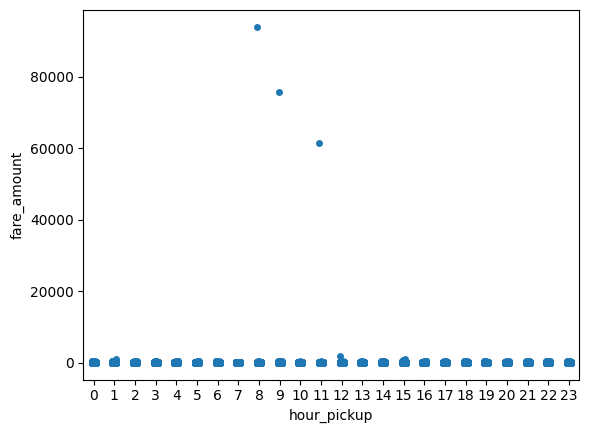

In [46]:
sns.stripplot(data=df, x='hour_pickup', y='fare_amount')

In [47]:

df['fare_amount'].describe()

count    2.715716e+07
mean     1.133108e+01
std      2.774443e+01
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

<Axes: ylabel='fare_amount'>

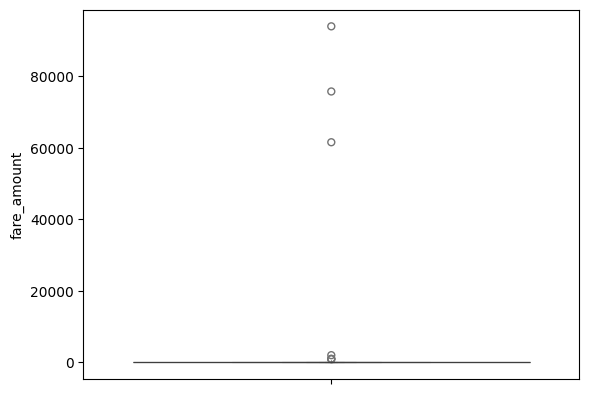

In [48]:
sns.boxenplot(df['fare_amount'])

In [50]:
mean_fare_amount = df['fare_amount'].mean()
std_dev_fare_amount = df['fare_amount'].std()
z_score_fare_amount = (df['fare_amount'] - mean_fare_amount)/std_dev_fare_amount
z_score_fare_amount

0           0.013297
1           0.114218
2          -0.260632
3          -0.058790
4          -0.145293
              ...   
27157156    0.114218
27157157   -0.217380
27157158    0.078175
27157159    0.719745
27157160    0.027714
Name: fare_amount, Length: 27157161, dtype: float64

In [53]:
df['fare_amount'].describe()

count    2.715716e+07
mean     1.133108e+01
std      2.774443e+01
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

In [52]:
# Calculate Q1, Q3, and IQR
Q1_fare_amount = df['fare_amount'].quantile(0.25)
Q3_fare_amount = df['fare_amount'].quantile(0.75)
IQR_fare_amount = Q3_fare_amount - Q1_fare_amount

# Define the bounds for outliers
lower_bound_fare_amount = Q1_fare_amount - 1.5 * IQR_fare_amount
upper_bound_fare_amount = Q3_fare_amount     + 1.5 * IQR_fare_amount

print(f"lower_bound : {lower_bound_fare_amount} and upper_bound {upper_bound_fare_amount}")

# Identify outliers
outliers_fare_amount = df[(df['fare_amount'] < lower_bound_fare_amount) | (df['fare_amount'] > upper_bound_fare_amount)]

outliers_fare_amount


lower_bound : -3.75 and upper_bound 22.25


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
9,31.70,-73.993488,40.743472,-74.033513,40.739652,1,22,8,2012,2,6,3.398677
13,37.70,-73.868463,40.770021,-73.988679,40.746176,2,30,6,2011,3,11,10.466844
14,56.80,-73.776757,40.645422,-74.005365,40.727822,1,12,11,2012,0,23,21.342498
16,34.33,-73.885342,40.773163,-73.985484,40.759653,1,20,5,2013,0,15,8.566367
28,39.83,-73.996972,40.757092,-73.850487,40.687195,1,23,6,2014,0,23,14.587598
...,...,...,...,...,...,...,...,...,...,...,...,...
27157123,30.00,-73.989186,40.736258,-73.896851,40.823257,2,1,6,2013,5,19,12.410775
27157139,35.50,-73.997122,40.725322,-73.867093,40.768829,1,22,8,2014,4,22,11.974525
27157143,27.50,-73.997446,40.721333,-73.942728,40.811683,1,6,3,2014,3,1,11.052895
27157147,32.00,-73.990448,40.746323,-73.971390,40.643635,1,10,1,2015,5,13,11.530859


In [8]:
df.groupby('hour_pickup')['fare_amount'].agg(['mean','count'])

,mean,count
hour_pickup,,
0,11.683129,1074770
1,11.398204,796974
2,11.408481,593504
3,11.858687,434212
4,13.566058,314684
5,15.123151,265525
6,12.152251,556817
7,10.961526,978567
8,10.969574,1233495


In [9]:
df = df[df['passenger_count'] <=6]
df.reset_index(drop=True,inplace=True)

In [10]:
df['week_day'].value_counts()

week_day
4    4179905
5    4123006
3    4068784
2    3940295
1    3803860
6    3561958
0    3479353
Name: count, dtype: int64

In [11]:
df.drop(columns=['pickup_datetime','time_pickup'],inplace=True)

In [12]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
date                   int32
month                  int32
year                   int32
week_day               int32
hour_pickup            int32
haversine_dist       float64
dtype: object

In [13]:
df[['date','month','year','hour_pickup','week_day']] = df[['date','month','year','hour_pickup','week_day']].astype(int)

In [14]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
date                   int64
month                  int64
year                   int64
week_day               int64
hour_pickup            int64
haversine_dist       float64
dtype: object

In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
0,11.7,-73.998862,40.723074,-73.958886,40.764018,1,11,5,2009,0,18,5.663016
1,14.5,-73.863269,40.769199,-73.888674,40.751314,1,29,4,2014,1,23,2.921201
2,4.1,-74.002092,40.750878,-73.998700,40.750160,1,14,11,2011,0,22,0.296675
3,9.7,-73.927200,40.764652,-73.964990,40.759925,1,30,6,2011,3,12,3.225852
4,7.3,-73.980698,40.769550,-73.973877,40.787225,2,9,4,2012,0,8,2.047570


In [16]:
train_data, test_data = train_test_split(df,test_size=0.2,random_state=242)

print(train_data.shape,test_data.shape)


(21725728, 12) (5431433, 12)


In [17]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
23664677,15.0,-73.946033,40.773242,-73.932394,40.764422,1,1,10,2014,2,18,1.510333
19636060,9.5,-73.982362,40.747515,-73.993015,40.735775,1,19,3,2013,1,10,1.584184
3668719,13.5,-74.009460,40.715196,-73.984361,40.728700,2,9,11,2013,5,12,2.593966
21024901,40.0,-73.782789,40.644457,-73.991952,40.677840,2,3,12,2013,1,0,18.029133
17196476,12.9,-73.985695,40.739677,-73.983461,40.715021,1,2,8,2011,1,18,2.748078


In [18]:
train_data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
date                   int64
month                  int64
year                   int64
week_day               int64
hour_pickup            int64
haversine_dist       float64
dtype: object

In [19]:
train_data.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 0
month                0
year                 0
week_day             0
hour_pickup          0
haversine_dist       0
dtype: int64

In [20]:
correlation_matrix = train_data.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
fare_amount,1.000000,0.003253,-0.002184,0.002687,-0.002108,0.005172,0.000794,0.008667,0.043388,0.000764,-0.006643,0.014899
pickup_longitude,0.003253,1.000000,-0.962594,0.950554,-0.962548,0.009308,0.017865,-0.007223,0.012468,0.005759,0.001268,0.144020
pickup_latitude,-0.002184,-0.962594,1.000000,-0.963270,0.993138,-0.008539,-0.018767,0.007789,-0.014052,-0.006812,-0.000738,-0.025390
dropoff_longitude,0.002687,0.950554,-0.963270,1.000000,-0.964028,0.009239,0.017856,-0.007244,0.012450,0.006098,0.000398,0.138052
dropoff_latitude,-0.002108,-0.962548,0.993138,-0.964028,1.000000,-0.008483,-0.018756,0.007809,-0.014001,-0.006759,-0.000800,-0.022527
passenger_count,0.005172,0.009308,-0.008539,0.009239,-0.008483,1.000000,0.003814,0.005385,0.005185,0.034777,0.016494,0.004477
date,0.000794,0.017865,-0.018767,0.017856,-0.018756,0.003814,1.000000,-0.016454,-0.009096,0.006990,0.001242,-0.000234
month,0.008667,-0.007223,0.007789,-0.007244,0.007809,0.005385,-0.016454,1.000000,-0.118022,-0.008525,-0.005271,-0.000910
year,0.043388,0.012468,-0.014052,0.012450,-0.014001,0.005185,-0.009096,-0.118022,1.000000,0.007108,-0.000320,0.000272
week_day,0.000764,0.005759,-0.006812,0.006098,-0.006759,0.034777,0.006990,-0.008525,0.007108,1.000000,-0.087214,0.000576


In [21]:
output_correlation = correlation_matrix[['fare_amount']].drop('fare_amount')

In [22]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

<Axes: >

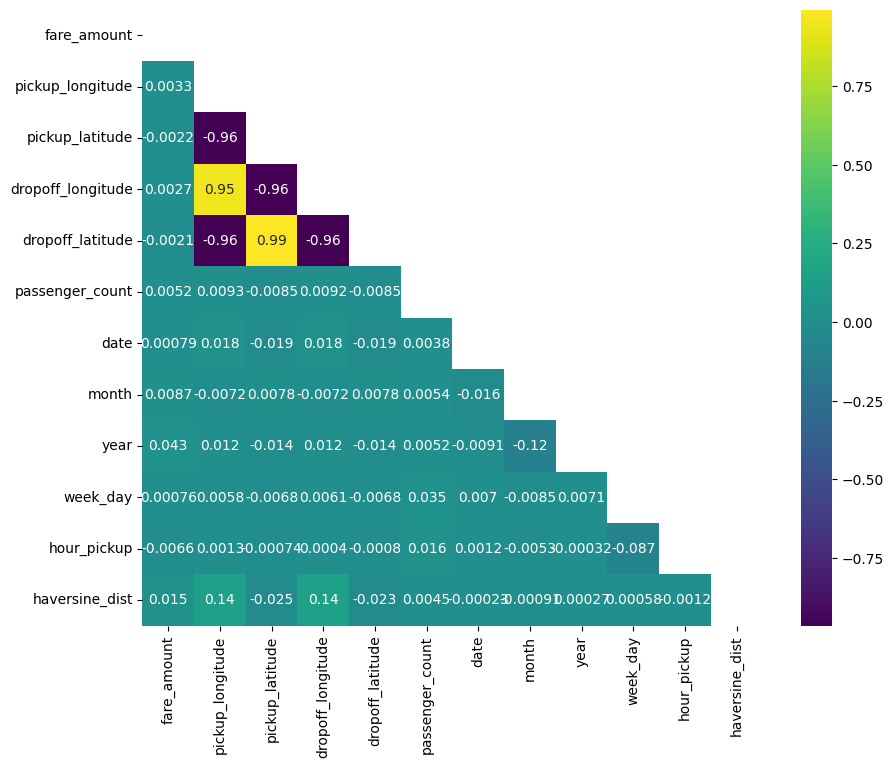

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,mask=mask, annot=True,cmap='viridis',cbar=True)

<Axes: >

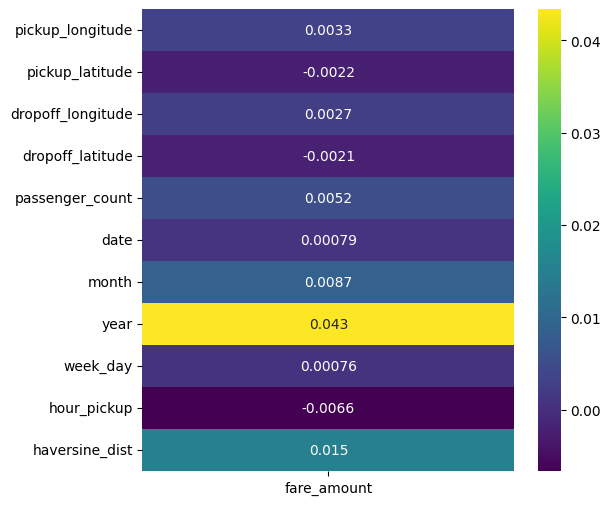

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(output_correlation,annot=True,cmap='viridis',cbar=True)

In [25]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
23664677,-73.946033,40.773242,-73.932394,40.764422,1,1,10,2014,2,18,1.510333
19636060,-73.982362,40.747515,-73.993015,40.735775,1,19,3,2013,1,10,1.584184
3668719,-74.009460,40.715196,-73.984361,40.728700,2,9,11,2013,5,12,2.593966
21024901,-73.782789,40.644457,-73.991952,40.677840,2,3,12,2013,1,0,18.029133
17196476,-73.985695,40.739677,-73.983461,40.715021,1,2,8,2011,1,18,2.748078


In [26]:
y_train

23664677    15.0
19636060     9.5
3668719     13.5
21024901    40.0
17196476    12.9
            ... 
3736956      9.0
11731725     8.9
6889798      4.0
2218818      4.0
21470350     5.7
Name: fare_amount, Length: 21725728, dtype: float64

In [27]:
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
11636767,-73.996997,40.722090,-73.995480,40.719067,1,27,1,2013,6,14,0.359633
19916904,-73.988235,40.751512,-73.974823,40.764805,1,29,10,2011,5,16,1.860360
11496067,-74.005332,40.720355,-73.984863,40.753902,5,11,1,2013,4,8,4.109625
18416183,-73.985495,40.764307,-74.014501,40.713983,2,21,7,2011,3,8,6.106127
14291726,-74.009552,40.739460,-74.010810,40.729318,1,29,5,2011,6,16,1.132709


In [28]:
y_test

11636767     6.5
19916904     8.9
11496067    11.5
18416183    15.3
14291726     4.5
            ... 
19732545     4.1
21919839     8.1
11454617    12.5
15450703     5.3
15677204     4.5
Name: fare_amount, Length: 5431433, dtype: float64

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=242)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler 

In [30]:
ss = StandardScaler()

In [31]:
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_ss = pd.DataFrame(ss.transform(X_test),columns=X_train.columns)

In [32]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'year',
       'week_day', 'hour_pickup', 'haversine_dist'],
      dtype='object')

In [33]:
X_train_ss

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,hour_pickup,haversine_dist
0,-0.014268,0.032230,-0.009485,0.028652,-0.523900,-1.694468,1.086555,1.215237,-0.534318,0.689003,-0.038158
1,-0.027694,0.022261,-0.031915,0.017547,-0.523900,0.378021,-0.950723,0.678195,-1.047411,-0.538739,-0.037200
2,-0.037709,0.009738,-0.028713,0.014804,0.240007,-0.773362,1.377595,0.678195,1.004960,-0.231804,-0.024109
3,0.046063,-0.017671,-0.031522,-0.004911,0.240007,-1.464192,1.668635,0.678195,-1.047411,-2.073417,0.175996
4,-0.028926,0.019224,-0.028380,0.009502,-0.523900,-1.579330,0.504476,-0.395889,-1.047411,0.689003,-0.022111
...,...,...,...,...,...,...,...,...,...,...,...
21725723,-0.039644,0.009391,-0.034220,0.013466,0.240007,1.644543,-0.659683,1.752280,-0.021225,-0.692207,-0.034630
21725724,-0.036901,0.020719,-0.027950,0.030227,-0.523900,1.414266,1.377595,-0.932932,1.518053,0.075132,-0.012601
21725725,-0.027189,0.015058,-0.028021,0.012759,3.295635,1.759681,-0.368643,1.752280,1.518053,-1.766481,-0.049642
21725726,-0.022550,0.026762,-0.023685,0.026501,-0.523900,-0.312809,0.795516,0.141153,-0.021225,-1.766481,-0.055168


In [34]:
# Linear regression
# random forest
# XGBoost

In [35]:
X_train_ss.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
date                 float64
month                float64
year                 float64
week_day             float64
hour_pickup          float64
haversine_dist       float64
dtype: object

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [37]:
lr = LinearRegression(n_jobs=-1)

In [38]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [39]:
lr.intercept_

np.float64(-1259.1368396334146)

In [40]:
pd.DataFrame(lr.coef_,index=X_train.columns)

,0
pickup_longitude,-0.080019
pickup_latitude,-0.141160
dropoff_longitude,-0.175563
dropoff_latitude,-0.129142
passenger_count,0.097492
date,0.004186
month,0.105590
year,0.627330
week_day,-0.003060
hour_pickup,-0.026468


In [41]:
y_pred = lr.predict(X_test_ss)
y_pred

array([-1258.92059899, -1259.3287973 , -1258.60469639, ...,
       -1259.05606056, -1259.64056001, -1259.53740956])

In [42]:
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse

np.float64(1270.9315177951983)

In [43]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

np.float64(1270.4793705194488)

In [44]:
r2_score = r2_score(y_test,y_pred)
r2_score

-1403.3306742676284

In [45]:
r2_score

-1403.3306742676284

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor()

In [56]:
rf.fit(X_train_ss,y_train)